## Hacer paso por paso esto. Recuerdo que se puede hacer de ambas formas. Comence con el proceso completo que incluye el entrenamiento del modelo de machine learning. Al final recuerdo que se podia aplicar tambien los datos tabulares. Rehacer y ordenar. 

In [67]:
## Paso uno cargar las librerias

import rasterio 
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt
import geopandas as gpd

In [68]:
# Vamos a leer los sitios de entrenamiento

training_sites = gpd.read_file(r'F:/Respaldo toshiba/projectos/Lingue/sitios_entrenamientos_lingue.gpkg', layer = 'sitios_entranamientos_lingue')
training_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
# Cargamos la imagen satelital

full_dataset = rasterio.open(r'C:\Users\crist\Documents\GitHub\land_use_classification\lingue_basin_img_7b_ord_final.tif')
full_dataset.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

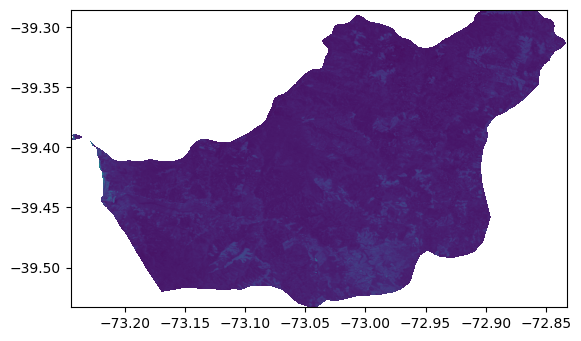

<AxesSubplot:>

In [70]:
show(full_dataset)

In [71]:

lingue_basin = rasterio.open(r'F:\Respaldo toshiba\projectos\Lingue\composite_2021_summer_lingue.tif')
lingue_basin.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [72]:
## Formas de seleccionar solo las primeras 7 bandas 
## La primera de ellas es transformar la imagen a un array 
## Luego ir seleccionando las imagenes

lingue_dataset = lingue_basin.read([1,2,3,4,5,6,7])

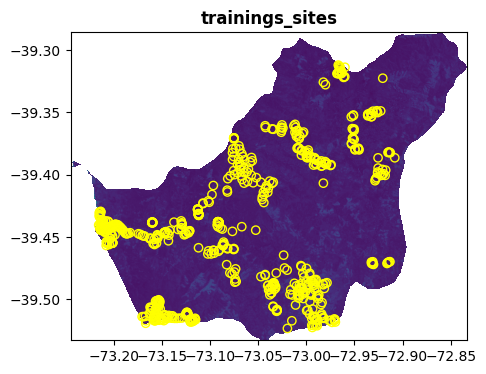

In [73]:
fig, ax1 = plt.subplots(figsize = (10,4))
show(full_dataset, ax = ax1, title = "trainings_sites")
training_sites.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
plt.show()

In [74]:
# Creamos una columna llamada Classname con el id de cada clase
# Quizas para evitar problemas sea bueno completar el nombre de las categorias
# Tener una categoria numerica y otra categorica
training_sites['Classname'] = training_sites['id_clase']

In [75]:
training_sites.isna().sum()

categoria     587
descrpcion    677
id_clase        2
geometry        0
Classname       2
dtype: int64

In [76]:
training_sites = training_sites.dropna(subset = ['id_clase'])
training_sites.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
Classname       0
dtype: int64

In [77]:
training_sites = training_sites.reset_index(drop = True)

In [78]:
# Verificamos que los crs sean los mismos
training_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [79]:
# Cuantas observaciones tenemos
len(training_sites)

687

In [80]:
training_sites.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
Classname       0
dtype: int64

In [81]:
training_sites = training_sites.dropna(subset =['id_clase'])
training_sites.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
Classname       0
dtype: int64

In [82]:
# Extraemos el valor de las geometrias

geoms = training_sites.geometry.values
geoms

<GeometryArray>
[<POINT (-73.113 -39.428)>, <POINT (-73.113 -39.428)>,
 <POINT (-73.113 -39.428)>, <POINT (-73.113 -39.428)>,
 <POINT (-73.113 -39.428)>, <POINT (-73.113 -39.428)>,
 <POINT (-73.113 -39.428)>, <POINT (-73.113 -39.428)>,
 <POINT (-73.113 -39.428)>, <POINT (-73.112 -39.433)>,
 ...
 <POINT (-73.168 -39.449)>, <POINT (-73.163 -39.451)>,
 <POINT (-73.163 -39.451)>, <POINT (-73.162 -39.451)>,
 <POINT (-73.161 -39.451)>, <POINT (-73.158 -39.452)>,
 <POINT (-73.143 -39.453)>, <POINT (-73.208 -39.446)>,
 <POINT (-73.185 -39.447)>, <POINT (-73.183 -39.447)>]
Length: 687, dtype: geometry

In [83]:
# Lets grab a single shapely geometry to check 
# En este caso las geometrias son puntos. Podrian haber sido poligonos
geometry = geoms[0]
print(type(geometry))
print(geometry)

<class 'shapely.geometry.point.Point'>
POINT (-73.11308347500469 -39.42803928687321)


In [84]:
# transform to GeoJSON format
# This allows us to easily pass the geometry 
# data to other functions that require it in string format. 
from shapely.geometry import mapping
feature = [mapping(geometry)]
print(type(feature))
print(feature)

<class 'list'>
[{'type': 'Point', 'coordinates': (-73.11308347500469, -39.42803928687321)}]


In [85]:
# Importamos las librerias de nuevo para estar seguro que no se nos ha olvidado nada

import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
from matplotlib import pyplot as plt

In [86]:
feature

[{'type': 'Point', 'coordinates': (-73.11308347500469, -39.42803928687321)}]

In [87]:
# Now let's extract the raster values values within the polygon using the rasterio mask() function

out_image, out_transform = mask(full_dataset, feature, crop = True)

In [88]:
out_image

array([[[0.002125 ]],

       [[0.0049025]],

       [[0.01263  ]],

       [[0.0070475]],

       [[0.196165 ]],

       [[0.03947  ]],

       [[0.0146925]]])

In [89]:
out_transform

Affine(0.00026949458523585647, 0.0, -73.11334198531739,
       0.0, -0.00026949458523585647, -39.427866303761505)

In [90]:
training_sites['id_clase'].unique()

array([1., 2., 3., 4., 5., 6.])

In [91]:
X = np.array([], dtype=np.int8).reshape(0,7) # pixels for training
y = np.array([], dtype=np.int8) # labels for training formato int8
#y = np.array([], dtype=np.string_) # labels for training formato string

In [92]:
# Cargamos la imagen satelital

full_dataset.count

7

In [93]:
### Esta pequena seccion busca abrir la imagen, obtener los datos, completar datos perdidos y ajustar las dimensiones 

with rasterio.open(r'C:\Users\crist\Documents\GitHub\land_use_classification\lingue_basin_img_7b_ord_final.tif') as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]
        
        # the mask function returs an array of the raster pixels within this feature
        out_image, out_transform = mask(src, feature, crop = True)
        # eliminate all the pixels with 0 values for all 8 bands - AKa not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == 0, axis=0)]
        # eliminate all the pixels with 255 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image_trimmed[:,~np.all(out_image_trimmed == 255, axis=0)]
        # reshape the array to [pixel count, bands] Es esto flattening?
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # append the labels to the y array
        y = np.append(y,[training_sites["id_clase"][index]] * out_image_reshaped.shape[0])
        # stack the pizels onto the pixel array
        X = np.vstack((X,out_image_reshaped))

In [94]:
## Obtenemos un np.strings

y.shape

(687,)

In [95]:
# Estos son los datos de entrenamiento un vector de 687, 7
X

array([[ 0.002125 ,  0.0049025,  0.01263  , ...,  0.196165 ,  0.03947  ,
         0.0146925],
       [ 0.0031425,  0.0051225,  0.012795 , ...,  0.217505 ,  0.04255  ,
         0.015105 ],
       [ 0.0031425,  0.0051225,  0.012795 , ...,  0.217505 ,  0.04255  ,
         0.015105 ],
       ...,
       [-0.0029075,  0.0038575,  0.0177175, ...,  0.007075 ,  0.0088075,
         0.0083125],
       [ 0.0020975,  0.007625 ,  0.02088  , ...,  0.009825 ,  0.00724  ,
         0.005535 ],
       [ 0.003115 ,  0.00856  ,  0.0203575, ...,  0.00933  ,  0.0080925,
         0.006525 ]])

In [96]:
X.shape ## Me ha quedado un array de 118, 6 dimensiones

(687, 7)

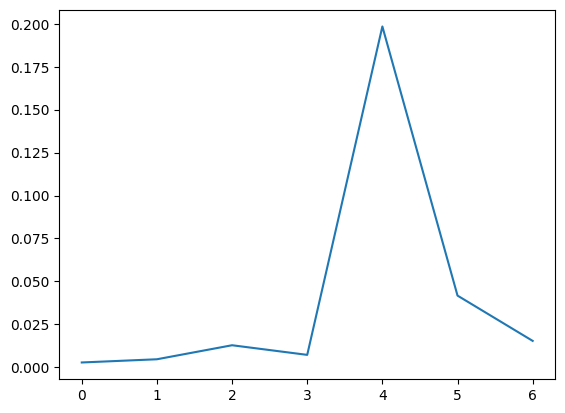

In [97]:
### Esto corresponde  a la firma espectral de un punto
plt.plot(X[3])
plt.show()

In [98]:
# Numero de sitios de entrenamiento
training_sites['id_clase'].size

687

In [99]:
# What are our classification labels es el id_clase (Ojo que esta en formato int8)
labels = np.unique(training_sites['id_clase'])

In [100]:
print('The training data include {n} classes:  {classes}\n'.format(n = training_sites['id_clase'].size,
                                                                   classes = labels))

The training data include 687 classes:  [1. 2. 3. 4. 5. 6.]



In [101]:
# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

Our X matrix is sized: (687, 7)
Our y array is sized: (687,)


In [102]:
# Que es esto?
classes = np.unique(y)
band_count = np.arange(1,6)

for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    print(band_intensity)
    print(class_type)
    

print(band_count)

[0.00197081 0.0040099  0.0110181  0.00635592 0.17097113 0.03759749
 0.01453803]
1.0
[0.00752891 0.01031379 0.02766792 0.01646112 0.25451883 0.07866667
 0.03178189]
2.0
[0.02467952 0.0301152  0.06506732 0.05103545 0.3969442  0.20958726
 0.10151735]
3.0
[0.0802301  0.09435423 0.12537046 0.13613161 0.2276545  0.23535272
 0.19650165]
4.0
[0.04185951 0.05512726 0.08885661 0.11419707 0.29689292 0.30135031
 0.18215953]
5.0
[0.00811698 0.01190595 0.02238412 0.01282686 0.01177079 0.00821893
 0.00628622]
6.0
[1 2 3 4 5]


In [38]:
# Creo que esto no lo necesitamos debido a que estamos trabajando directamente con 
# clases numericas por el momento

#def str_class_to_int(class_array):
 #   class_array[class_array == 'Forest_Plantation'] = 0
  #  class_array[class_array == 'Grassland'] = 1
   # class_array[class_array == 'Native_Forest'] = 2
   # class_array[class_array == 'Urban'] = 3
   # return(class_array.astype(int))

In [103]:
X.shape

(687, 7)

In [104]:
X

array([[ 0.002125 ,  0.0049025,  0.01263  , ...,  0.196165 ,  0.03947  ,
         0.0146925],
       [ 0.0031425,  0.0051225,  0.012795 , ...,  0.217505 ,  0.04255  ,
         0.015105 ],
       [ 0.0031425,  0.0051225,  0.012795 , ...,  0.217505 ,  0.04255  ,
         0.015105 ],
       ...,
       [-0.0029075,  0.0038575,  0.0177175, ...,  0.007075 ,  0.0088075,
         0.0083125],
       [ 0.0020975,  0.007625 ,  0.02088  , ...,  0.009825 ,  0.00724  ,
         0.005535 ],
       [ 0.003115 ,  0.00856  ,  0.0203575, ...,  0.00933  ,  0.0080925,
         0.006525 ]])

In [105]:
y.shape

(687,)

In [106]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [107]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [44]:
np.isnan(X).sum()

0

In [45]:
np.isnan(y).sum()

0

In [46]:
from sklearn.tree import DecisionTreeClassifier
## Partimos por lo simple

dt = DecisionTreeClassifier(criterion= 'gini')
dt.fit(X,y)

DecisionTreeClassifier()

In [47]:
# Ejemplo de como leer una sola banda
img = full_dataset.read(1)

In [48]:
# Ejemplo de como leer todo la imagen como array
img_full = full_dataset.read()

In [49]:
np.isnan(img_full).sum()

4504122

In [50]:
# reemplazamos los nan que estan fuera del area de estudio por 0

img_full = np.nan_to_num(img_full, nan=0.0)

In [51]:
np.isnan(img_full).sum()

0

In [52]:
full_dataset

<open DatasetReader name='C:/Users/crist/Documents/GitHub/land_use_classification/lingue_basin_img_7b_ord_final.tif' mode='r'>

In [53]:
# Esta es la estructura de la imagen
img_full
print(img_full.shape)

(7, 918, 1530)


In [54]:
# Incorporamos nuevos metodos de rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image

In [55]:
## transformar img_full de formato array a formato imagan

reshaped_img_full = reshape_as_image(img_full)
print(reshaped_img_full.shape)

(918, 1530, 7)


Now we can predict for each pixel in our image:

In [56]:
# Este es el array
img_full.shape

(7, 918, 1530)

In [57]:
# Esta es la imagen

reshaped_img_full.shape

(918, 1530, 7)

In [58]:
# Aqui no se que estamos haciendo un flattening?
reshaped_img_full.reshape(-1,7).shape

(1404540, 7)

In [59]:
class_prediction = gnb.predict(reshaped_img_full.reshape(-1,7))

In [60]:
class_prediction_dt = dt.predict(reshaped_img_full.reshape(-1,7))

In [61]:
class_prediction_dt.dtype

dtype('float64')

In [62]:
# Reshape our classification map back into a 2D matrix so we can visualize it
# Here are we using the structure of the reshaped_img_full to fit the original image
class_prediction = class_prediction.reshape(reshaped_img_full[:,:,0].shape)

In [63]:
class_prediction_dt = class_prediction_dt.reshape(reshaped_img_full[:,:,0].shape)

In [173]:
# Esto no es necesario porque estamos trabajando directamente con valores numericos
# class_prediction = str_class_to_int(class_prediction)

In [64]:
class_prediction

array([[6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       ...,
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.]])

Let's visualize it!

First we'll make a colormap so we can visualize the classes, which are just encoded as integers, in more logical colors. Don't worry too much if this code is confusing! It can be a little clunky to specify colormaps for matplotlib.

In [65]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (52, 78, 31, 255)),   # Forest plantation - Darkgreen
    (1, (27,255, 1, 255)),      # Green - Native Forest
    (2, (1, 255, 214, 255)),    # Lightblue - Emergent Grassland
    (3, (255, 1, 1, 255)),      # Urbano 
    (4, (239, 255, 1, 255)),          # Suelo descubierto
    (5, (1, 18, 255, 255))      # Water
   
    
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (0, 0, 0, 255) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

Now show the classified map next to the RGB image!

C:\Users\crist\AppData\Local\Temp\ipykernel_51596\3402247368.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


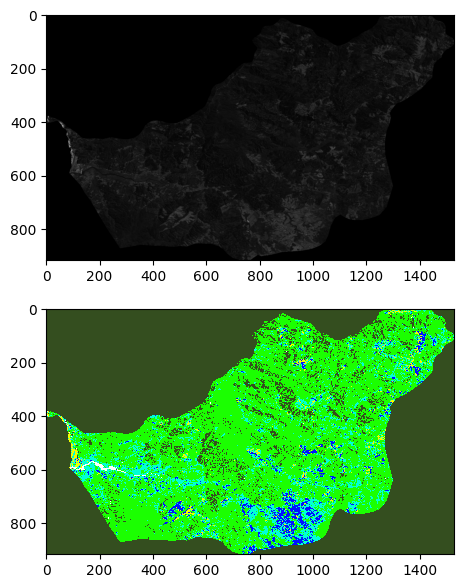

In [66]:
fig, axs = plt.subplots(2,1,figsize=(10,7))

img_stretched = color_stretch(reshaped_img_full, [2, 2, 2])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction_dt, cmap=cmap, interpolation='none')

fig.show()